<a href="https://colab.research.google.com/github/JorgeHdzRiv/Car_Prices_Prediction/blob/main/Actividad_Aprendizaje_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Elección de un dataset

## Caracteristicas del dataset
- **Dataset:** Car Prices
- **Fuente:** Kaggle https://www.kaggle.com/datasets/hellbuoy/car-price-prediction
- **Descripción:** El dataset Car Prices es conjunto de datos de Kaggle que se utiliza para predecir el precio de los automóviles. El conjunto de datos contiene información sobre varios atributos de los automóviles, como la marca, el modelo, el año, la transmisión, la distancia recorrida, el tipo de combustible y otros.

# Exploración Inicial del Dataset

## Importar datos

In [145]:
import pandas as pd
import numpy as np

In [146]:
data = pd.read_csv('https://raw.githubusercontent.com/JorgeHdzRiv/Car_Prices_Prediction/main/CarPrice_Assignment.csv',
                   sep=',')
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [148]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

- **Dimensiones:** 205 instancias, 26 columnas.

## Tipos de variables

| Variable | Descripción |
|----------|-------------|
| car_ID   | ID único de cada observación (Entero) |
| symboling | Su calificación de riesgo de seguro asignada, Un valor de +3 - Indica que el automóvil es riesgoso, -3 que probablemente sea bastante seguro. |
| CarName  | Nombre del automovil (categórica) |
| fueltype | Tipo de combustible del automóvil, es decir, gasolina o diésel (categórico) |
| aspiration | Aspiración utilizada en un automóvil (Categórica) |
| doornumber | Número de puertas en un automóvil (categórico) |
| carbody  | Carrocería del coche (categórica) |
| drivewheel | Tipo de rueda motriz (categórica) |
| enginelocation | Ubicación del motor del automóvil (categórica) |
| wheelbase | Distancia entre ejes del automóvil (numérica) |
| carlength | Longitud del coche (Numérico) |
| carwidth  | Ancho del coche (Numérico) |
| carheight | Altura del coche (numérico) |
| curbweight | El peso de un automóvil sin ocupantes ni equipaje. (Numérico) |
| enginetype | Tipo de motor. (Categórico) |
| cylindernumber | Cilindro colocado en el automóvil (categórico) |
| enginesize | Tamaño del coche (Numérico) |
| fuelsystem | Sistema de combustible del automóvil (categórico) |
| boreratio | Boreratio del coche (Numérico) |
| stroke | Carrera o volumen dentro del motor (Numérico) |
| compressionratio | Relación de compresión del automóvil (numérica) |
| horsepower | Caballos de fuerza (Numérico) |
| peakrpm | RPM máximas del coche (numéricas) |
| citympg | Kilometraje en ciudad (Numérico) |
| highwaympg | Kilometraje en carretera (numérico) |
| price (variable dependiente) | Precio del automóvil (numérico)|


## Datos faltantes

In [149]:
missing_data = data.isnull().sum()
print("Valores faltantes por columna:")
print(missing_data)

Valores faltantes por columna:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


**No hay datos faltantes o nulos**

## Duplicados

In [150]:
duplicated_data = data.duplicated().sum()
print("Valores duplicados: ",duplicated_data)

Valores duplicados:  0


**No hay valores duplicados**

## Estadísticas Básicas

In [151]:
#Stats de variables numericas
numeric_columns = data.select_dtypes(include='number')
basic_statistics = numeric_columns.describe().round(2)
print("Estadisticas basicas:")
print(basic_statistics)

Estadisticas basicas:
       car_ID  symboling  wheelbase  carlength  carwidth  carheight  \
count  205.00     205.00     205.00     205.00    205.00     205.00   
mean   103.00       0.83      98.76     174.05     65.91      53.72   
std     59.32       1.25       6.02      12.34      2.15       2.44   
min      1.00      -2.00      86.60     141.10     60.30      47.80   
25%     52.00       0.00      94.50     166.30     64.10      52.00   
50%    103.00       1.00      97.00     173.20     65.50      54.10   
75%    154.00       2.00     102.40     183.10     66.90      55.50   
max    205.00       3.00     120.90     208.10     72.30      59.80   

       curbweight  enginesize  boreratio  stroke  compressionratio  \
count      205.00      205.00     205.00  205.00            205.00   
mean      2555.57      126.91       3.33    3.26             10.14   
std        520.68       41.64       0.27    0.31              3.97   
min       1488.00       61.00       2.54    2.07          

In [152]:
#Stat de la variable dependiente price
data['price'].describe().round(2)

count      205.00
mean     13276.71
std       7988.85
min       5118.00
25%       7788.00
50%      10295.00
75%      16503.00
max      45400.00
Name: price, dtype: float64

- Precio promedio = $13,276

- Precio minimo = $5,118

- Precio maximo = $45,400

In [153]:
# Borrando la columna de car_ID
data.drop(columns='car_ID',inplace=True)

In [154]:
data.head(2)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


# Visualizacion de datos

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline

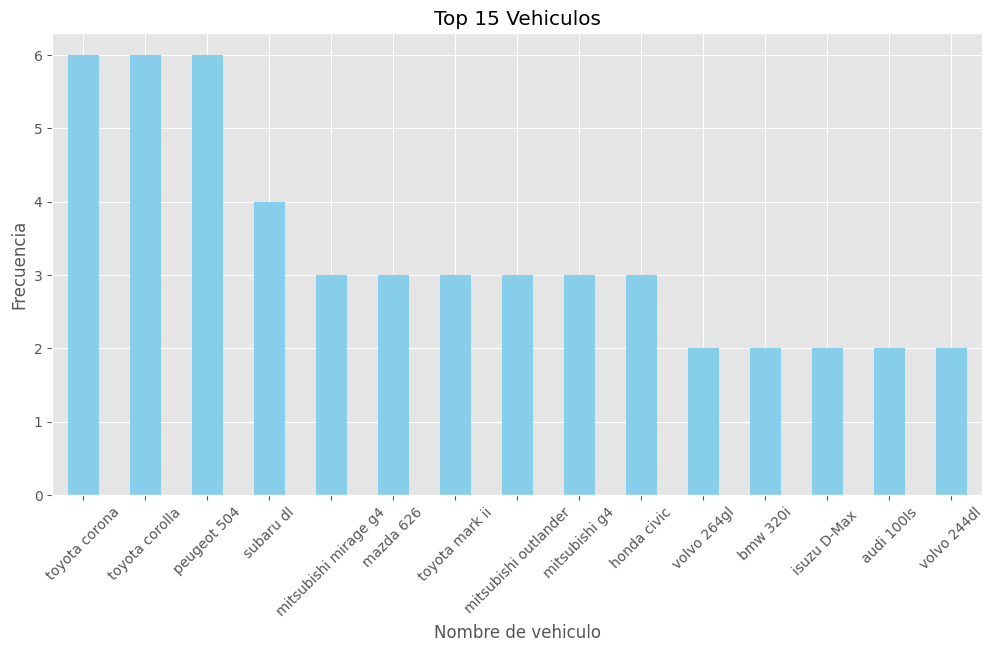

In [156]:
carname_counts = data["CarName"].value_counts().head(15)
plt.figure(figsize=(12, 6))
carname_counts.plot(kind='bar', color='skyblue')
plt.title('Top 15 Vehiculos')
plt.xlabel('Nombre de vehiculo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

El vehiculo mas repetido es de la marca **Toyota**

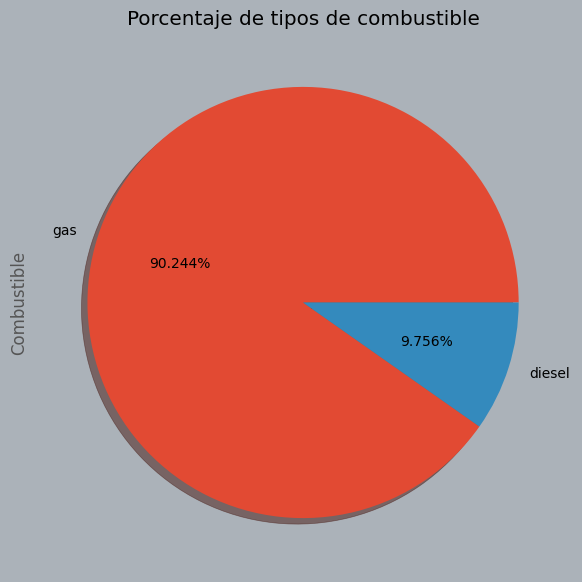

In [157]:
plt.figure(figsize = [7, 7], clear = True, facecolor = "#ABB2B9")
data["fueltype"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True);
plt.title("Porcentaje de tipos de combustible")
plt.ylabel("Combustible")
plt.show()

fueltype
diesel    15838.1500
gas       12999.7982
Name: price, dtype: float64


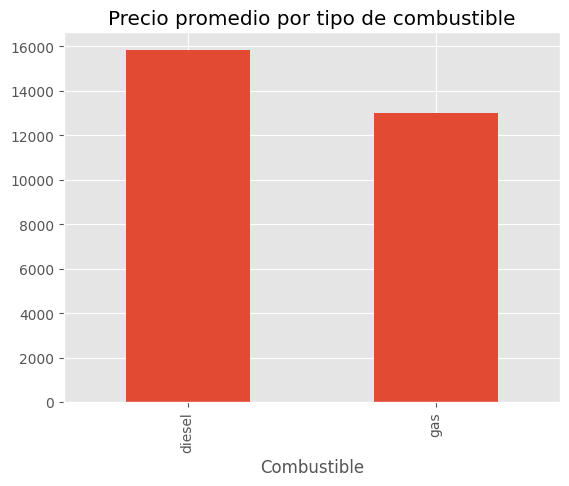

In [158]:
fuel_price = data.groupby(by='fueltype')['price'].mean()
print(fuel_price)
fuel_price.plot(kind='bar')
plt.title("Precio promedio por tipo de combustible")
plt.xlabel("Combustible")
plt.show()

- La mayoría utiliza coches que funcionan con Gas alrededor del 90% y el precio medio es inferior al de los coches que funcionan con Diesel.

- Alguna categoría utiliza el automóvil que funciona con diésel alrededor del 10 % pero el precio promedio es mayor que el del automóvil que funciona con gasolina.

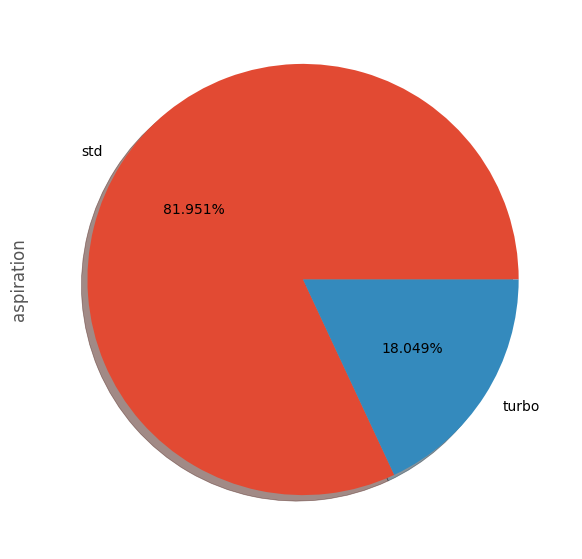

In [159]:
#Porcentaje de vehiculos mas repetidos en aspiracion
plt.figure(figsize = [7, 7], clear = True, facecolor = "#ffffff")
data["aspiration"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True);

aspiration
std      12611.270833
turbo    16298.166676
Name: price, dtype: float64


<Axes: xlabel='aspiration'>

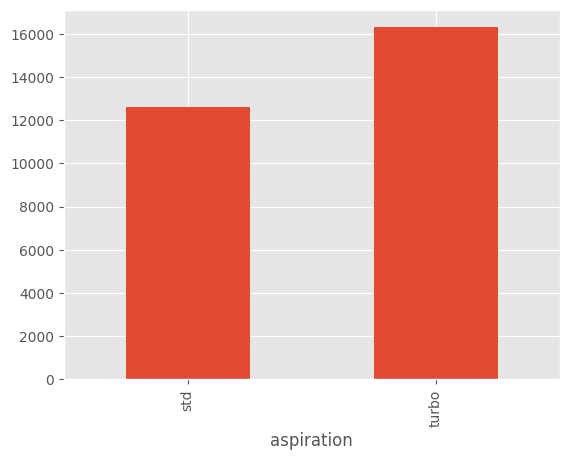

In [160]:
#Precio promedio de acuerdo a la aspiracion
SP = data.groupby("aspiration")["price"].mean()
print(SP)
SP.plot(kind="bar")

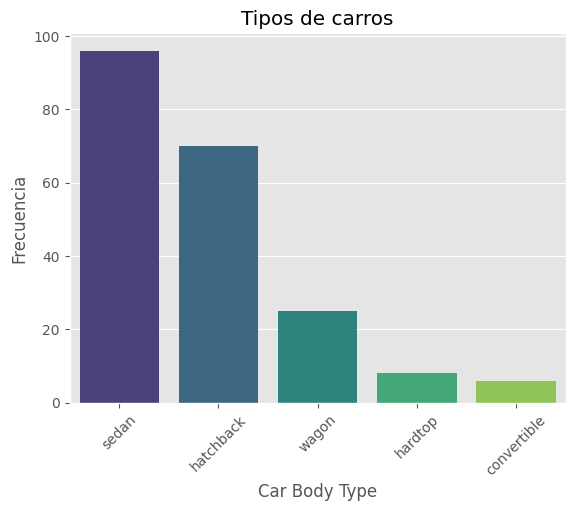

In [161]:
#Tipos de coches
carbody = data['carbody'].value_counts()
sns.barplot(x=carbody.index,y=carbody.values,palette='viridis')
plt.title('Tipos de carros')
plt.xlabel('Car Body Type')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

carbody
convertible    21890.500000
hardtop        22208.500000
hatchback      10376.652386
sedan          14344.270833
wagon          12371.960000
Name: price, dtype: float64


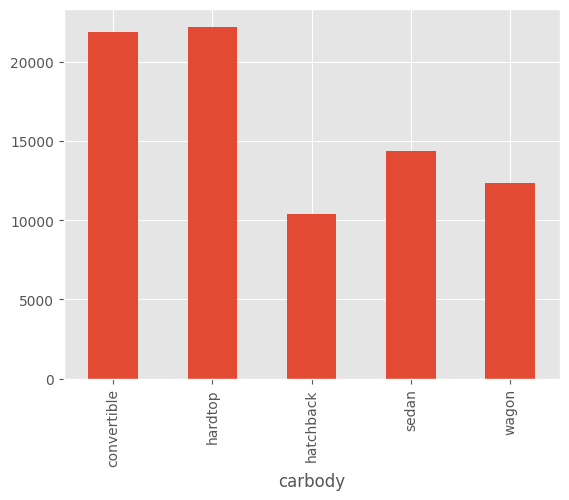

In [162]:
# Precio promedio de acuerdo al tipo de carrp
DP = data.groupby("carbody")['price'].mean()
print(DP)
DP.plot(kind='bar')
plt.show()

enginetype
ohc      11574.048426
rotor    13020.000000
ohcf     13738.600000
l        14627.583333
dohc     18116.416667
ohcv     25098.384615
dohcv    31400.500000
Name: price, dtype: float64


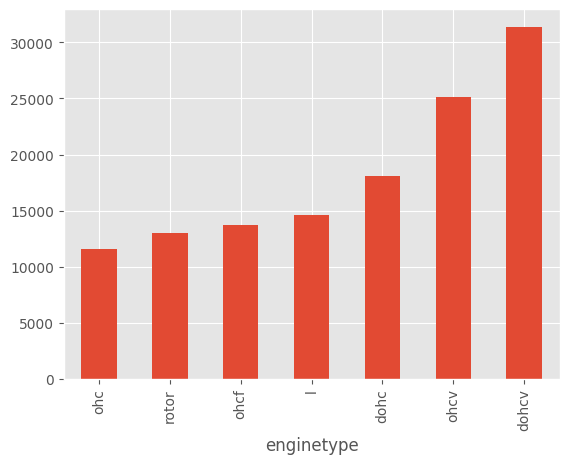

In [163]:
#Precio de acuerdo al tipo de motor
ETP=data.groupby("enginetype")['price'].mean().sort_values()
print(ETP)
ETP.plot(kind="bar")
plt.show()

cylindernumber
three      5151.000000
four      10285.754717
two       13020.000000
five      21630.469727
six       23671.833333
twelve    36000.000000
eight     37400.100000
Name: price, dtype: float64


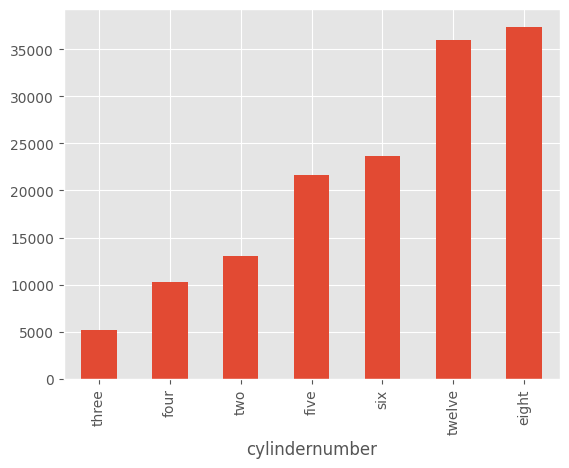

In [164]:
#Precio de acuerdo al numero de cilindros
CP = data.groupby("cylindernumber")["price"].mean().sort_values()
print(CP)
CP.plot(kind='bar')
plt.show()

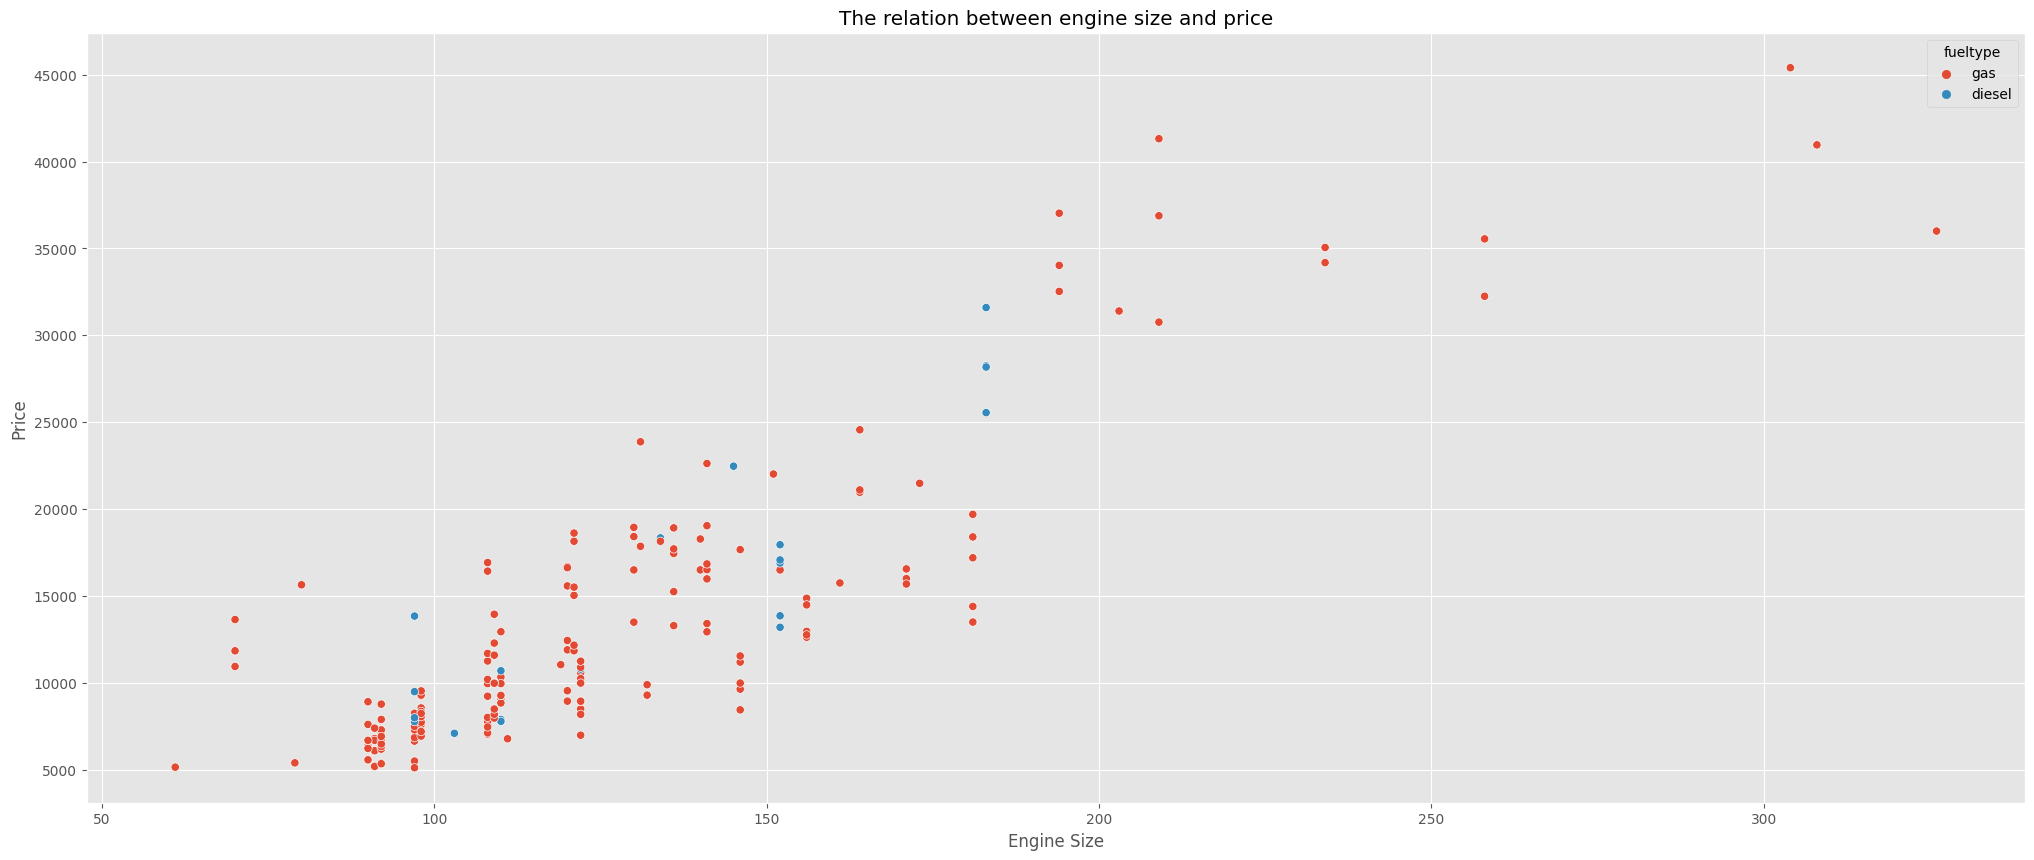

In [165]:
# Relacion entre engine size y price de acuerdo al tipo de combustible
plt.figure(figsize=(25,10))
sns.scatterplot(data=data,x="enginesize",y="price",hue="fueltype",markers=True)
plt.title("The relation between engine size and price")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.show()

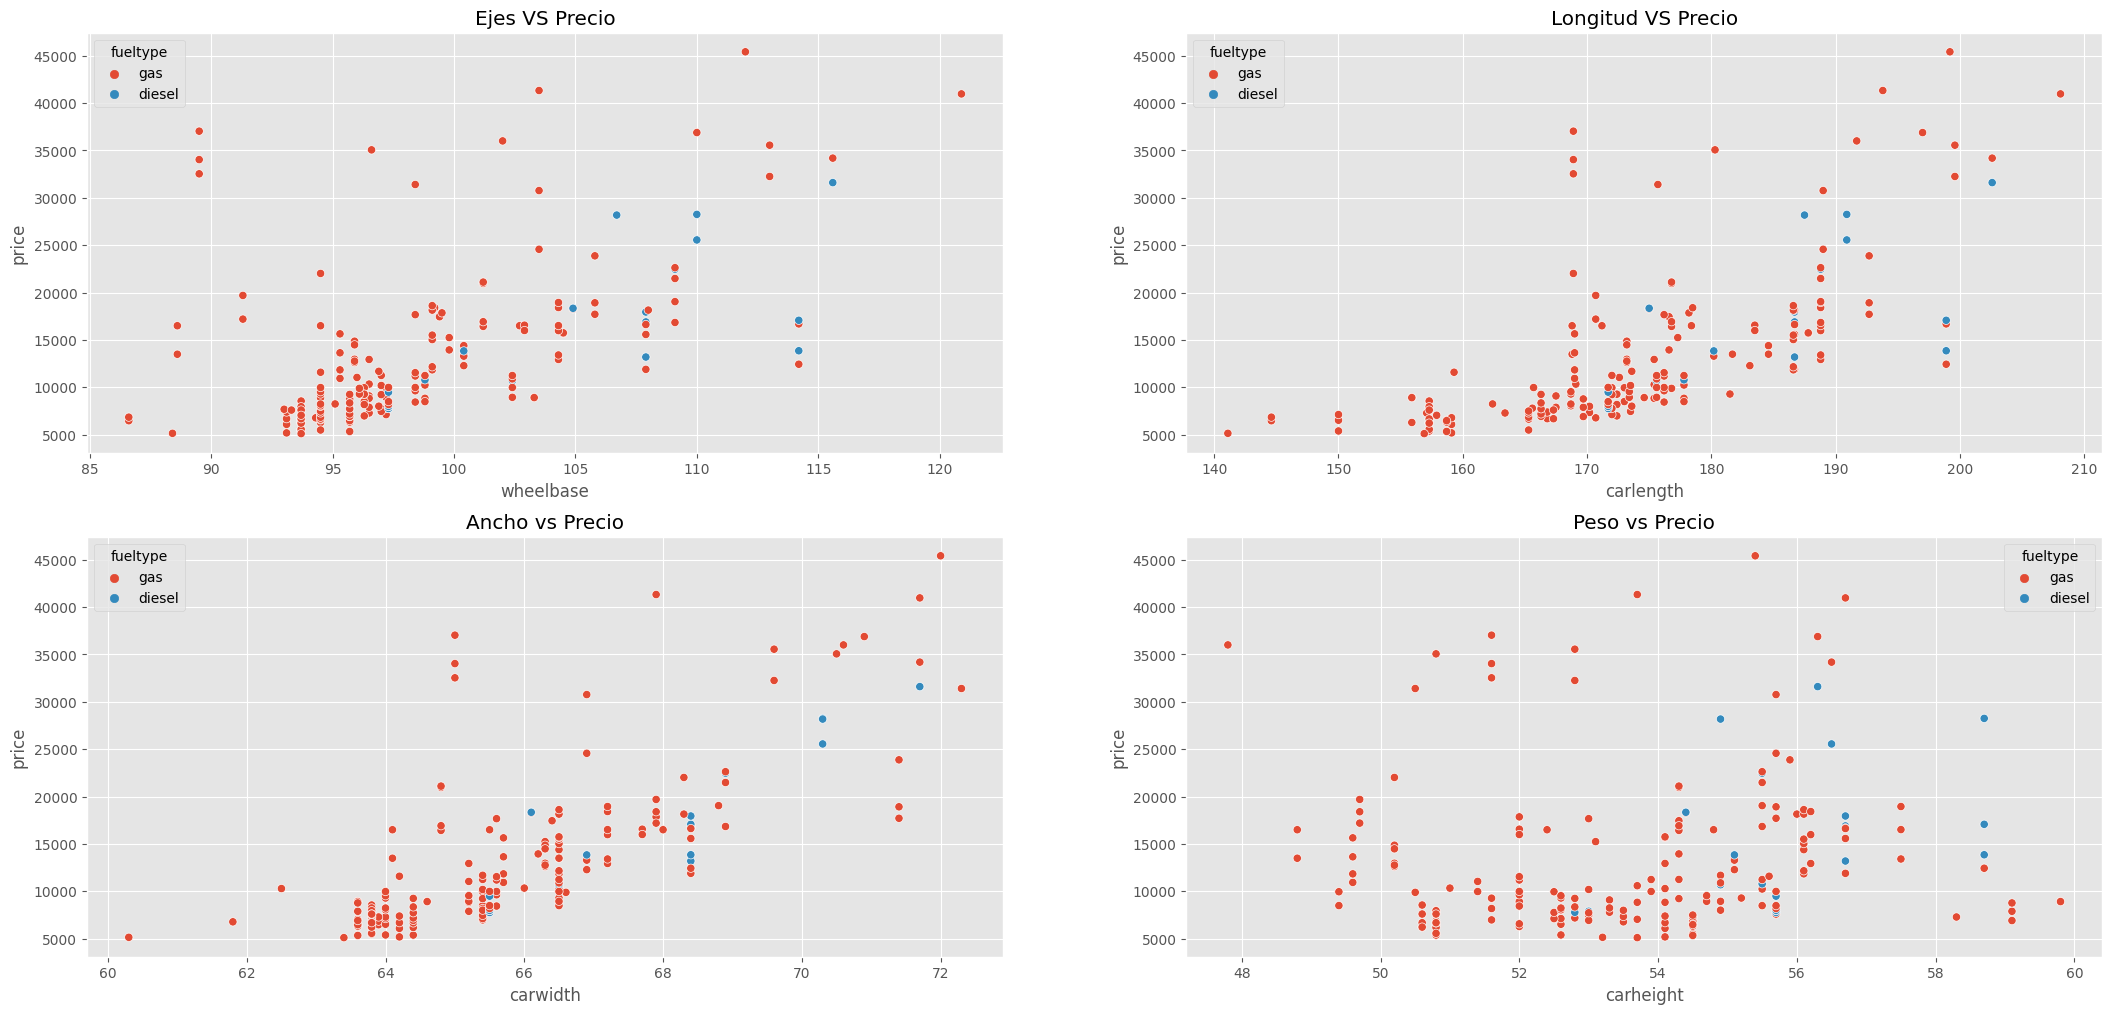

In [166]:
#Relacion de acuerdo a dimensionalidad del vehiculo y tipo de combustible
fig = plt.figure(figsize=(26, 12))

#Ejes
ax1 = fig.add_subplot(221)
sns.scatterplot(data=data,x="wheelbase",y="price",hue="fueltype",markers=True)

#Largo
ax2 = fig.add_subplot(222)
sns.scatterplot(data=data,x="carlength",y="price",hue="fueltype",markers=True)

#Ancho
ax3 = fig.add_subplot(223)
sns.scatterplot(data=data,x="carwidth",y="price",hue="fueltype",markers=True)

#Peso
ax4 = fig.add_subplot(224)
sns.scatterplot(data=data,x="carheight",y="price",hue="fueltype",markers=True)


ax1.title.set_text('Ejes VS Precio')
ax2.title.set_text('Longitud VS Precio')
ax3.title.set_text('Ancho vs Precio')
ax4.title.set_text('Peso vs Precio')
plt.show()

# Resultados del breve Analisis

- El conjunto de datos es de = (Filas = 205, columnas = 26) 👊

- Sin valor nulo🤘

- Sin valor duplicado 🤘

### Precio de los carros


In [167]:
car_max = data[data['price'] == data['price'].max()]
car_max

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
74,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,199.2,...,304,mpfi,3.8,3.35,8.0,184,4500,14,16,45400.0


- Precio maximo = $45,400

In [168]:
car_min = data[data['price'] == data['price'].min()]
car_min

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
138,2,subaru,gas,std,two,hatchback,fwd,front,93.7,156.9,...,97,2bbl,3.62,2.36,9.0,69,4900,31,36,5118.0


- Precio minimo = $5,118

In [169]:
range_car_mean = data[(data['price'] >= 13276) & (data['price'] <= 14000)].sort_values(by='price')
range_car_mean

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
191,0,volkswagen rabbit,gas,std,four,sedan,fwd,front,100.4,180.2,...,136,mpfi,3.19,3.400,8.5,110,5500,19,24,13295.0
195,-1,volvo 144ea,gas,std,four,wagon,rwd,front,104.3,188.8,...,141,mpfi,3.78,3.150,9.5,114,5400,23,28,13415.0
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.680,9.0,111,5000,21,27,13495.0
101,0,nissan dayz,gas,std,four,sedan,fwd,front,100.4,181.7,...,181,mpfi,3.43,3.270,9.0,152,5200,17,22,13499.0
103,0,nissan otti,gas,std,four,sedan,fwd,front,100.4,184.6,...,181,mpfi,3.43,3.270,9.0,152,5200,19,25,13499.0
57,3,mazda rx-7 gs,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,3.33,3.255,9.4,101,6000,17,23,13645.0
192,0,volkswagen rabbit custom,diesel,turbo,four,sedan,fwd,front,100.4,180.2,...,97,idi,3.01,3.400,23.0,68,4500,33,38,13845.0
110,0,peugeot 504,diesel,turbo,four,wagon,rwd,front,114.2,198.9,...,152,idi,3.70,3.520,21.0,95,4150,25,25,13860.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.400,10.0,102,5500,24,30,13950.0


- Precio promedio = $13,276

#Modelo de Machine Learning



## **Elección del Algoritmo**

- **Algoritmo Elegido:** k-Vecinos Más Cercanos Regresion (KNeighborsRegressor)

- **Algoritmo Elegido:** Regresion Lineal (LinearRegression)






## **Justificación de la Elección:**
- **Naturaleza del problema:** El problema que estamos abordando es de regresión, ya que estamos tratando de predecir un valor continuo (el precio de los automóviles) en lugar de clasificar en categorías.

- **Tipo y distribución de los datos:** Nuestros datos contienen características numéricas y continuas, como "horsepower", "enginesize", etc. Esto hace que tanto la regresión lineal como el k-NN Regressor sean opciones apropiadas, ya que ambos pueden manejar variables numéricas. Además, el k-NN se basa en la distancia, lo que es especialmente útil cuando las características son de escala similar.

- **Tamaño del dataset:** El dataset no es extremadamente grande, lo que significa que el costo computacional no es una preocupación significativa para ninguno de los modelos. Sin embargo, dado que es un dataset de tamaño moderado, el k-NN Regressor puede ser una elección eficiente ya que no requiere una fase de entrenamiento costosa.

- **Complejidad y capacidad del modelo:** Dado que estamos tratando de predecir los precios de automóviles, un modelo simple como la regresión lineal puede ofrecer una solución efectiva sin introducir una alta complejidad.

- **Costo computacional:** Con un dataset de tamaño moderado, tanto la regresión lineal como el k-NN Regressor son manejables en términos de costo computacional. Sin embargo, es importante mencionar que el k-NN puede ser aún más eficiente en términos de tiempo de entrenamiento, ya que no requiere un proceso de entrenamiento costoso, lo que lo hace adecuado para un dataset de este tamaño.

## Construccion Modelo

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error ,mean_squared_error
from sklearn.metrics import median_absolute_error,confusion_matrix
from sklearn.metrics import accuracy_score,r2_score

In [171]:
data.head(2)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [173]:
clean_data = data.copy()

In [174]:
category = []
numeric = []
for col in clean_data.columns:
  if clean_data[col].dtypes == 'O':
    category.append(col)
  else:
    numeric.append(col)

data_n = clean_data[numeric]
data_c = clean_data[category]


In [175]:
col = data_c.columns
col

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [176]:
from sklearn.preprocessing import LabelEncoder
encoders = {}
categorical_columns = data_c.columns

for column in categorical_columns:
  encoders[column] = LabelEncoder()
  data_c[column] = encoders[column].fit_transform(data_c[column])

<ipython-input-176-f79c5b9390be>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c[column] = encoders[column].fit_transform(data_c[column])
<ipython-input-176-f79c5b9390be>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c[column] = encoders[column].fit_transform(data_c[column])
<ipython-input-176-f79c5b9390be>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [177]:
encoders

{'CarName': LabelEncoder(),
 'fueltype': LabelEncoder(),
 'aspiration': LabelEncoder(),
 'doornumber': LabelEncoder(),
 'carbody': LabelEncoder(),
 'drivewheel': LabelEncoder(),
 'enginelocation': LabelEncoder(),
 'enginetype': LabelEncoder(),
 'cylindernumber': LabelEncoder(),
 'fuelsystem': LabelEncoder()}

In [178]:
frames = [data_c, data_n]

data_f = pd.concat(frames,axis=1)
data_f.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,1,0,1,0,2,0,0,2,5,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,0,2,5,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,5,3,5,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,1,0,0,3,1,0,3,2,5,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,1,0,0,3,0,0,3,1,5,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [179]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CarName           205 non-null    int64  
 1   fueltype          205 non-null    int64  
 2   aspiration        205 non-null    int64  
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    int64  
 5   drivewheel        205 non-null    int64  
 6   enginelocation    205 non-null    int64  
 7   enginetype        205 non-null    int64  
 8   cylindernumber    205 non-null    int64  
 9   fuelsystem        205 non-null    int64  
 10  symboling         205 non-null    int64  
 11  wheelbase         205 non-null    float64
 12  carlength         205 non-null    float64
 13  carwidth          205 non-null    float64
 14  carheight         205 non-null    float64
 15  curbweight        205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [180]:
data.shape

(205, 25)

highwaympg         -0.697599
citympg            -0.685751
CarName            -0.231439
fueltype           -0.105679
peakrpm            -0.085267
carbody            -0.083976
symboling          -0.079978
doornumber         -0.031835
cylindernumber     -0.027628
enginetype          0.049171
compressionratio    0.067984
stroke              0.079443
carheight           0.119336
aspiration          0.177926
enginelocation      0.324973
fuelsystem          0.526823
boreratio           0.553173
wheelbase           0.577816
drivewheel          0.577992
carlength           0.682920
carwidth            0.759325
horsepower          0.808139
curbweight          0.835305
enginesize          0.874145
price               1.000000
Name: price, dtype: float64


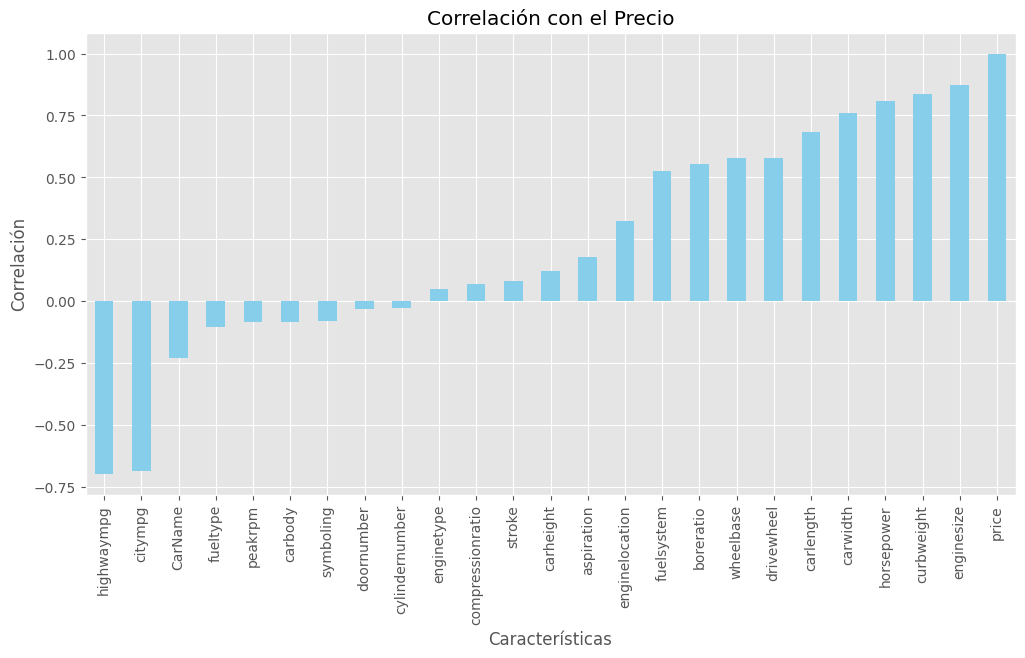

In [181]:
#Correlacion del precio de acuerdo a todas las caracteristicas
correlation_with_price = data_f.corr()["price"].sort_values()
print(correlation_with_price)

plt.figure(figsize=(12, 6))
correlation_with_price.plot(kind='bar', color='skyblue')
plt.title('Correlación con el Precio')
plt.xlabel('Características')
plt.ylabel('Correlación')
plt.xticks(rotation=90)
plt.show()

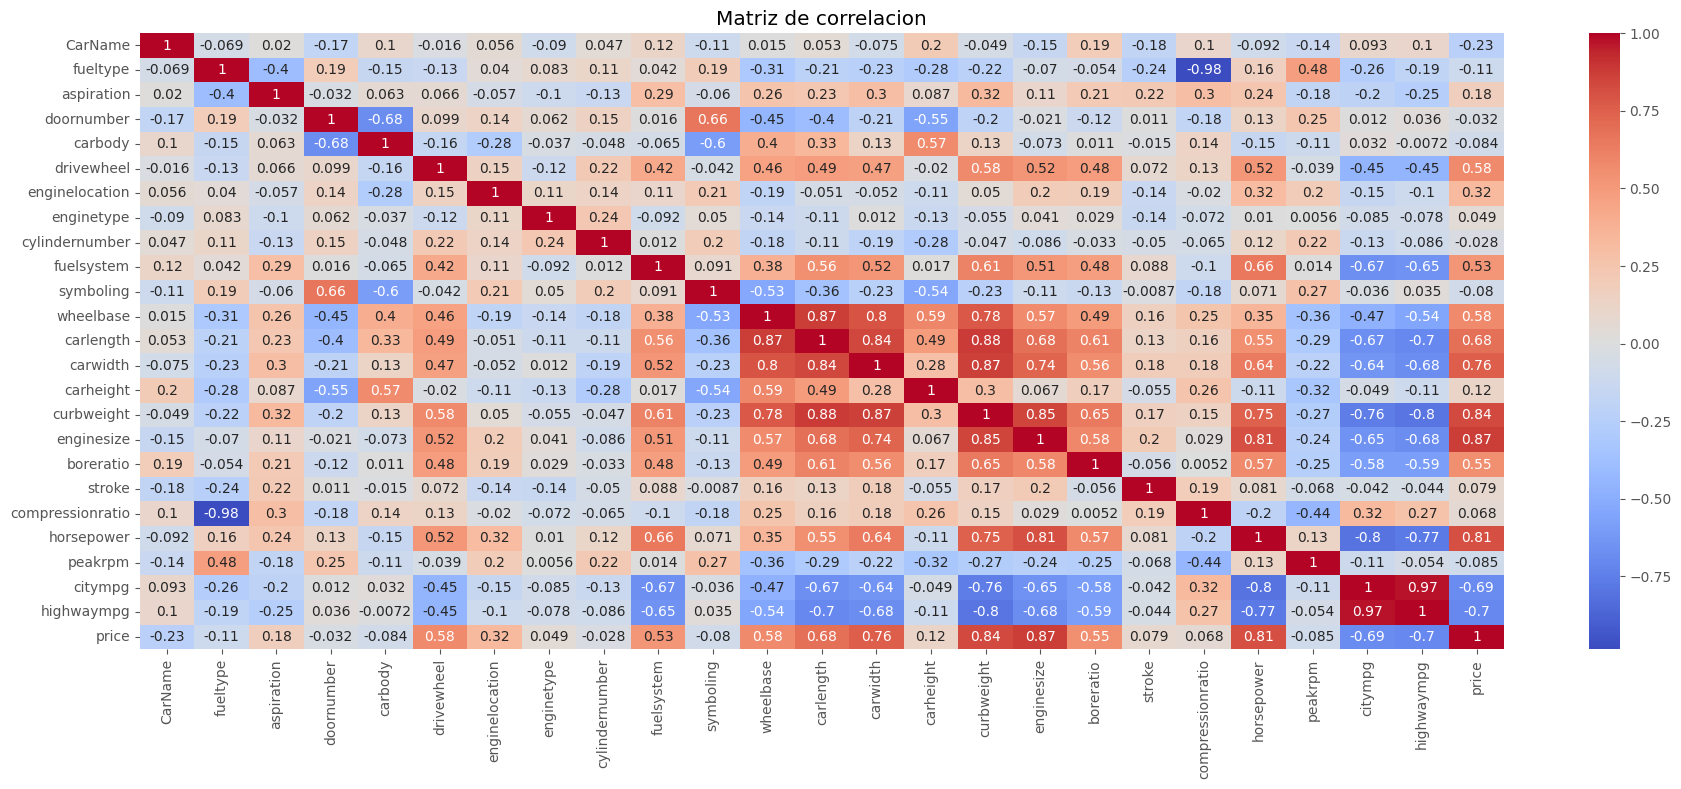

In [182]:
correlation_matrix = data_f.corr()
plt.figure(figsize=(22, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlacion')
plt.show()

In [183]:
# Eleccion de columnas

data1=data_f[["highwaympg","citympg","CarName",'enginelocation','fuelsystem',
              'boreratio','wheelbase','drivewheel','carlength','carwidth',
              'horsepower','curbweight','enginesize','price']]

data1.head(2)

,highwaympg,citympg,CarName,enginelocation,fuelsystem,boreratio,wheelbase,drivewheel,carlength,carwidth,horsepower,curbweight,enginesize,price
0,27,21,2,0,5,3.47,88.6,2,168.8,64.1,111,2548,130,13495.0
1,27,21,3,0,5,3.47,88.6,2,168.8,64.1,111,2548,130,16500.0


## Uso del modelo con las caracteristicas seleccionadas

In [184]:
# Separacion de variables
X = data1.drop(columns='price')
y = data1['price']

# Separacion de conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,
                                                    random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (143, 13)
X Test  :  (62, 13)
Y Train :  (143,)
Y Test  :  (62,)


In [185]:
# Objetos de los modelos

LR = LinearRegression()
KNN = KNeighborsRegressor()

LinearRegression() : 85.2375366417536
KNeighborsRegressor() : 76.12398013734366


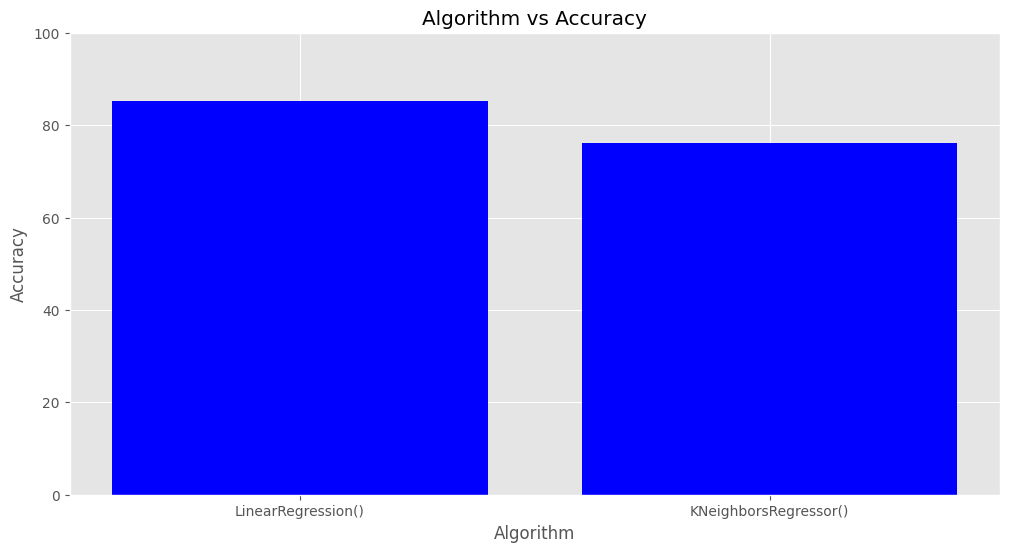

In [186]:
# Entrenando y predicciendo

models = [LR,KNN]
results = {}
for model in models:
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print(model,":",r2_score(y_test,y_pred)*100)
  results.update({str(model):model.score(X_test,y_test)*100})

#Accuracy de los modelos

plt.figure(figsize=(12, 6))
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.bar(results.keys(),results.values(),color='blue')
plt.ylim(0, 100)
plt.show()

In [187]:
data1.sample(2)

,highwaympg,citympg,CarName,enginelocation,fuelsystem,boreratio,wheelbase,drivewheel,carlength,carwidth,horsepower,curbweight,enginesize,price
69,25,22,16,0,3,3.58,106.7,2,187.5,70.3,123,3495,183,28176.0
34,34,30,43,0,0,2.91,93.7,1,150.0,64.0,76,1956,92,7129.0


In [188]:
# Valores al azar para predecir algun precio de acuerdo a los datos

# highwaympg,citympg,CarName,enginelocation,fuelsystem,boreratio,wheelbase,drivewheel,carlength,carwidth,horsepower,curbweight,enginesize
test = [[30	,30	,3	,2	,4	,3.47	,88.6	,2	,180	,64.1	,130	,2500,130]]

test_data = {
    'highwaympg': [30],
    'citympg': [30],
    'CarName': [3],
    'enginelocation': [2],
    'fuelsystem': [4],
    'boreratio': [3.47],
    'wheelbase': [88.6],
    'drivewheel': [2],
    'carlength': [180],
    'carwidth': [64.1],
    'horsepower': [130],
    'curbweight': [2500],
    'enginesize': [130]
}


test_df = pd.DataFrame(test_data)

price_pred = LR.predict(test_df)[0]
print("Precio predicho: $", round(price_pred,2))

Precio predicho: $ 41867.73


## Uso del modelo con todas las caracteristicas del vehiculo

In [189]:
# Separacion de variables
X = data_f.drop(columns='price')
y = data_f['price']

# Separacion de conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,
                                                    random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (143, 24)
X Test  :  (62, 24)
Y Train :  (143,)
Y Test  :  (62,)


In [190]:
# Objetos de los modelos

LR = LinearRegression()
KNN = KNeighborsRegressor()

LinearRegression() : 83.99116957802623
KNeighborsRegressor() : 78.54138779486186


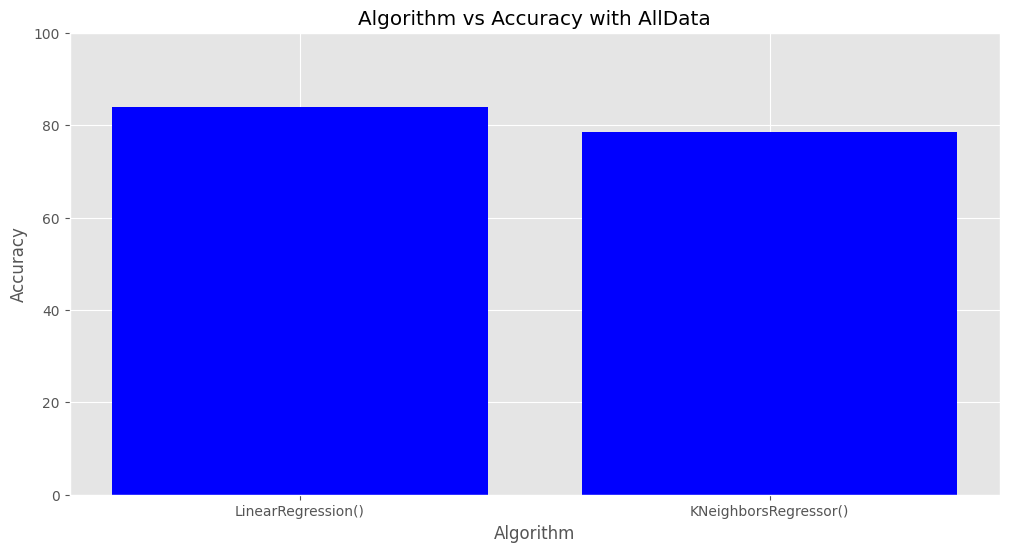

In [191]:
# Entrenando y predicciendo

models = [LR,KNN]
results = {}
for model in models:
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print(model,":",r2_score(y_test,y_pred)*100)
  results.update({str(model):model.score(X_test,y_test)*100})

#Accuracy de los modelos

plt.figure(figsize=(12, 6))
plt.title("Algorithm vs Accuracy with AllData")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.bar(results.keys(),results.values(),color='blue')
plt.ylim(0, 100)
plt.show()

# **Resultados:**
- Después de dividir el dataset en un conjunto de entrenamiento y prueba, ademas de aplicar a ambos modelos entrenamiento y score se puede observar que el modelo de regresion lineal basico es mejor para este problema, ademas de observar que mientras menos caracteristicas sera mas precisa la prediccion.


# **Conclusión:**
El modelo de Regresión Lineal parece ser adecuado para el conjunto de datos de predicción de precios de automóviles, considerando la naturaleza del problema y las características de los datos. Su capacidad para capturar relaciones lineales entre las características y la variable objetivo hace que sea una elección sólida.

Sin embargo, es importante destacar que la elección del modelo no es definitiva y puede variar según la aplicación y los objetivos específicos. Aunque se podrian obtener otros resultados comparando otros modelos, como árboles de decisión o modelos de ensamble, para asegurarse de que se ha seleccionado el enfoque óptimo para este problema particular.

Además, la optimización de hiperparámetros y la selección de características pueden ayudar a mejorar aún más el rendimiento del modelo seleccionado.